In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Load the merged dataset
file_path = './Virginia Public Schools Archive/demographics_sol_dataset.csv'
df = pd.read_csv(file_path)

mean_sol_pass_rate = df['SOL Pass Rate'].mean()
print(mean_sol_pass_rate)

0.663268653808416


In [3]:
df.shape

(1877, 22)

In [4]:
df.isnull().sum().sort_values(ascending=False)

cohort_dropout_rate                              1563
percentage_homeless                               222
free_reduced_lunch_percentage                     182
Bachelors_Percent                                 171
Doctoral_Percent                                  171
Masters_Percent                                   171
Total_Per_Pupil_Expenditures                      167
Division_Level_Expenditures_Per_Pupil_State       167
Division_Level_Expenditures_Per_Pupil_Federal     167
School_Level_Expenditures_Per_Pupil_State         167
School_Level_Expenditures_Per_Pupil_Federal       167
Total_Expenditures                                167
chronic_absenteeism_rate                          166
SOL Pass Rate                                     166
percentage_foster_care                             98
percentage_male                                    58
percentage_english_learners                        44
percentage_disadvantaged                           25
percentage_military         

In [5]:
numerical_df = df.select_dtypes(include= np.number)
num_summary = numerical_df.describe().T
numerical_df.head()

,percentage_disadvantaged,percentage_english_learners,percentage_foster_care,percentage_male,percentage_homeless,percentage_military,percentage_disabled,free_reduced_lunch_percentage,chronic_absenteeism_rate,cohort_dropout_rate,Bachelors_Percent,Masters_Percent,Doctoral_Percent,SOL Pass Rate,School_Level_Expenditures_Per_Pupil_Federal,School_Level_Expenditures_Per_Pupil_State,Division_Level_Expenditures_Per_Pupil_Federal,Division_Level_Expenditures_Per_Pupil_State,Total_Per_Pupil_Expenditures,Total_Expenditures
0,0.274112,0.137532,0.002538,0.522843,0.0,0.124365,0.120558,0.258,0.1081,NaN,35.0,62.0,2.0,0.7650,524.0,7333.0,571.0,3640.0,12068.0,9941898.0
1,0.381919,0.053803,0.000000,0.496310,0.0,0.025830,0.169742,0.405,0.2736,NaN,44.0,56.0,0.0,0.6975,198.0,9208.0,745.0,2110.0,12261.0,14493019.0
2,0.542135,0.194842,0.002809,0.502809,0.0,0.007022,0.141854,0.609,0.1985,NaN,31.0,69.0,0.0,0.5300,879.0,8338.0,543.0,4412.0,14172.0,6946661.0
3,0.358209,0.052434,0.003731,0.526119,0.0,0.014925,0.055970,0.373,0.2289,NaN,52.0,44.0,0.0,0.7200,861.0,8633.0,45.0,2983.0,12522.0,5874488.0
4,0.600000,0.000000,0.000000,0.494624,0.0,0.070968,0.094624,0.911,0.2294,NaN,58.0,32.0,3.0,0.5175,1540.0,6746.0,446.0,2738.0,11470.0,5366257.0


In [6]:
num_summary

,count,mean,std,min,25%,50%,75%,max
percentage_disadvantaged,1852.0,4.789965e-01,2.409772e-01,0.00,3.177511e-01,4.799329e-01,6.182932e-01,1.000000e+00
percentage_english_learners,1833.0,1.995751e-01,3.170542e-01,0.00,0.000000e+00,4.929577e-02,2.116788e-01,1.000000e+00
percentage_foster_care,1779.0,1.171120e-01,3.178648e-01,0.00,0.000000e+00,1.650165e-03,5.780540e-03,1.000000e+00
percentage_male,1819.0,5.124010e-01,6.093966e-02,0.00,4.992472e-01,5.151515e-01,5.310835e-01,1.000000e+00
percentage_homeless,1655.0,5.191336e-02,2.155176e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
percentage_military,1857.0,1.825376e-01,3.389872e-01,0.00,7.812500e-03,2.306080e-02,1.194030e-01,1.000000e+00
percentage_disabled,1860.0,2.439119e-01,2.864344e-01,0.00,1.139402e-01,1.399344e-01,1.791184e-01,1.000000e+00
free_reduced_lunch_percentage,1695.0,5.092136e-01,2.767305e-01,0.00,2.940000e-01,4.780000e-01,7.535000e-01,1.000000e+00
chronic_absenteeism_rate,1711.0,1.967887e-01,1.046815e-01,0.00,1.201000e-01,1.803000e-01,2.551000e-01,9.172000e-01
cohort_dropout_rate,314.0,5.200541e-02,6.097394e-02,0.00,1.740000e-02,3.925000e-02,6.350000e-02,5.057000e-01


In [7]:
categorical_df = df.select_dtypes(include= "object")
cat_summary = categorical_df.describe().T
categorical_df.head()

,Division Name,School Name
0,Prince William County,A. Henderson Elementary
1,Culpeper County,A.G. Richardson Elementary
2,Chesterfield County,A.M. Davis Elementary
3,Warren County,A.S. Rhodes Elementary
4,Hampton City,A.W.E. Bassette Elementary


In [8]:
cat_summary

,count,unique,top,freq
Division Name,1877,133,Fairfax County,199
School Name,1877,1803,Mountain View Elementary,8


In [9]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
cohort_dropout_rate,83.271177
percentage_homeless,11.827384
free_reduced_lunch_percentage,9.696324
Bachelors_Percent,9.110282
Masters_Percent,9.110282
Doctoral_Percent,9.110282
Total_Per_Pupil_Expenditures,8.897176
Division_Level_Expenditures_Per_Pupil_State,8.897176
Division_Level_Expenditures_Per_Pupil_Federal,8.897176
School_Level_Expenditures_Per_Pupil_State,8.897176


drop rows with missing target variable & feature with over 80% missing

In [10]:
df = df.drop(columns='cohort_dropout_rate')
df = df.dropna(subset=['SOL Pass Rate'])

In [11]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
percentage_homeless,12.098188
percentage_foster_care,5.201636
percentage_male,3.156049
percentage_english_learners,2.279369
percentage_disadvantaged,1.285798
percentage_military,1.168907
free_reduced_lunch_percentage,0.935126
percentage_disabled,0.876680
Doctoral_Percent,0.292227
Bachelors_Percent,0.292227


<h1> 0 IF PASS RATE LESS THAN GUIDELINES, 1 IF ABOVE<h1>

In [12]:
df['SOL Pass Category'] = (df['SOL Pass Rate'] >= 0.73).astype(int)

In [13]:
# df_temp = df.drop(columns=['Division Name', 'School Name', 'SOL Pass Rate'])
df_temp = df.drop(columns=[ 'School Name', 'SOL Pass Rate'])

In [15]:
num_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "mean")),
    ("Scaler", StandardScaler())])

cat_transformer = Pipeline([
    ("Imputer", SimpleImputer(strategy= "constant", fill_value= "MISSING")),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

In [16]:
categorical_columns = df_temp.select_dtypes(include='object').columns
numerical_columns = df_temp.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(
    [("num", num_transformer, numerical_columns),
     ("cat", cat_transformer, categorical_columns)],
    remainder= "passthrough")

pipeline = Pipeline([("preprocessor", preprocessor)])

In [17]:
X_preprocessed = preprocessor.fit_transform(df_temp)

In [18]:
X = pd.DataFrame(X_preprocessed, columns= preprocessor.get_feature_names_out())
X.head()

,num__percentage_disadvantaged,num__percentage_english_learners,num__percentage_foster_care,num__percentage_male,num__percentage_homeless,num__percentage_military,num__percentage_disabled,num__free_reduced_lunch_percentage,num__chronic_absenteeism_rate,num__Bachelors_Percent,...,cat__Division Name_Virginia Beach City,cat__Division Name_Warren County,cat__Division Name_Washington County,cat__Division Name_West Point,cat__Division Name_Westmoreland County,cat__Division Name_Williamsburg-James City County,cat__Division Name_Winchester City,cat__Division Name_Wise County,cat__Division Name_Wythe County,cat__Division Name_York County
0,-0.873119,-0.221090,-0.381386,0.200292,-0.263296,-0.183014,-0.434027,-0.912335,-0.847472,-0.506522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.420032,-0.484900,-0.389405,-0.260542,-0.263296,-0.472237,-0.262086,-0.378474,0.733977,0.223246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.253316,-0.040519,-0.380531,-0.147663,-0.263296,-0.527442,-0.359579,0.362396,0.016353,-0.830863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.519679,-0.489213,-0.377616,0.257204,-0.263296,-0.504246,-0.659821,-0.494688,0.306843,0.871928,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.496509,-0.654422,-0.389405,-0.289830,-0.263296,-0.339748,-0.524692,1.459172,0.311620,1.358440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold

from scipy.stats import uniform, randint
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np

In [20]:
y = df['SOL Pass Category']
y

0       1
1       0
2       0
3       0
4       0
       ..
1872    1
1873    1
1874    0
1875    0
1876    0
Name: SOL Pass Category, Length: 1711, dtype: int32

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Define models
models = {
    f"RandomForest_{i}": RandomForestRegressor(random_state=42)
    for i in range(1, 2)
}
# Add Linear Regression to the models
models["LinearRegression"] = LinearRegression()

# Define hyperparameter grids for RandomForestRegressor
random_param_grids = {
    f"RandomForest_{i}": {
        "n_estimators": [50 * i, 100 * i, 150 * i],
        "max_depth": [10 * i, 20 * i, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
    if i % 2 == 0 else {
        "n_estimators": [75 * i, 125 * i, 200 * i],
        "max_depth": [5 * i, 15 * i, None],
        "min_samples_split": [3, 6, 9],
        "min_samples_leaf": [1, 3, 5]
    }
    for i in range(1, 2)
}
# Linear Regression does not require hyperparameter tuning
random_param_grids["LinearRegression"] = None


<h1> Classification <h1>

KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform

models = {
    "knn_clf1": KNeighborsClassifier(),
    "knn_clf2": KNeighborsClassifier()
}

random_param_grids = {
    "knn_clf1": {
        "n_neighbors": randint(1, 50),  
        "weights": ["uniform", "distance"], 
        "metric": ["euclidean", "manhattan", "minkowski"] 
    },
    "knn_clf2": {
        "n_neighbors": randint(1, 50),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
        "leaf_size": randint(10, 50)  
    }
}

In [39]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, RandomizedSearchCV

# Cross-validation configuration
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Store model tuning and results
grids = {}
test_accuracies = {}
results = []

# Loop through models and hyperparameter grids
for model_name, model in models.items():
    if model_name in random_param_grids and random_param_grids[model_name]:  # Check if grid is defined
        print(f'Training and tuning {model_name}...')
        
        # RandomizedSearchCV for hyperparameter tuning
        grids[model_name] = RandomizedSearchCV(
            estimator=model,
            param_distributions=random_param_grids[model_name],
            n_iter=5,
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=3
        )
        grids[model_name].fit(X_train, y_train)
        
        # Extract best parameters and scores
        best_params = grids[model_name].best_params_
        best_score = grids[model_name].best_score_
        print(f'Best parameters for {model_name}: {best_params}')
        print(f'Best CV Accuracy for {model_name}: {best_score:.4f}\n')

        # Evaluate on test set
        best_model = grids[model_name].best_estimator_
        y_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
        test_recall = recall_score(y_test, y_pred, average='weighted')        # Adjust 'average' as needed
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        test_accuracies[model_name] = test_accuracy
        print(f"Test Metrics for {model_name}:")
        print(f" - Accuracy: {test_accuracy:.4f}")
        print(f" - Precision: {test_precision:.4f}")
        print(f" - Recall: {test_recall:.4f}")
        print(f" - F1 Score: {test_f1:.4f}\n")

        # Log results for this model
        results.append({
            "model": model_name,
            "mean_test_score": best_score,
            "test_accuracy": test_accuracy,
            "test_precision": test_precision,
            "test_recall": test_recall,
            "test_f1": test_f1,
            "best_params": best_params
        })
    else:
        print(f'{model_name} does not require hyperparameter tuning. Training directly...')
        
        # Train directly without tuning
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, average='weighted')
        test_recall = recall_score(y_test, y_pred, average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        test_accuracies[model_name] = test_accuracy
        print(f"Test Metrics for {model_name}:")
        print(f" - Accuracy: {test_accuracy:.4f}")
        print(f" - Precision: {test_precision:.4f}")
        print(f" - Recall: {test_recall:.4f}")
        print(f" - F1 Score: {test_f1:.4f}\n")

        # Log results for this model
        results.append({
            "model": model_name,
            "mean_test_score": test_accuracy,  # No CV score since not tuned
            "test_accuracy": test_accuracy,
            "test_precision": test_precision,
            "test_recall": test_recall,
            "test_f1": test_f1,
            "best_params": model.get_params()
        })

# Save results to a CSV file
results_df = pd.DataFrame(results)
output_file = "ml_results_matrix.csv"

if os.path.exists(output_file):
    # If the file exists, append the new results
    existing_df = pd.read_csv(output_file)
    updated_df = pd.concat([existing_df, results_df], ignore_index=True)
    updated_df.to_csv(output_file, index=False)
    print(f"Results appended to {output_file}")
else:
    # If the file does not exist, create it
    results_df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

Training and tuning knn_clf1...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for knn_clf1: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
Best CV Accuracy for knn_clf1: 0.9766

Test Metrics for knn_clf1:
 - Accuracy: 0.9883
 - Precision: 0.9884
 - Recall: 0.9883
 - F1 Score: 0.9883

Training and tuning knn_clf2...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for knn_clf2: {'leaf_size': 18, 'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'uniform'}
Best CV Accuracy for knn_clf2: 0.9817

Test Metrics for knn_clf2:
 - Accuracy: 0.9854
 - Precision: 0.9855
 - Recall: 0.9854
 - F1 Score: 0.9854

Results appended to ml_results_matrix.csv


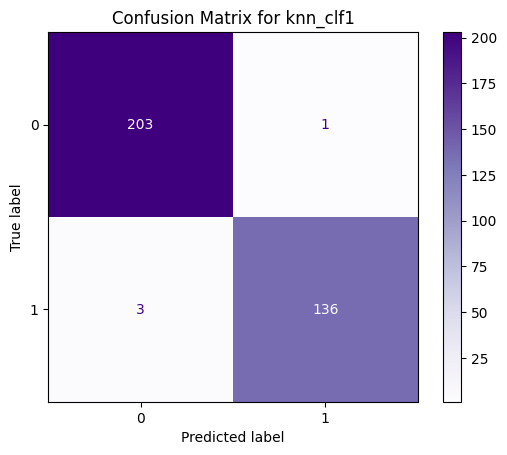

In [47]:
if "n_neighbors" in results_df.columns and "mean_test_score" in results_df.columns:
    plt.figure(figsize=(10,6))
    for model_name in model.keys():
        model_results = results_df[results_df["model"] == model_name]
        plt.plot(
            model_results["best_params"].apply(lambda x: x.get("n_neighbors", np.nan)),
            model_results["mean_test_score"],
            marker = 'o',
            label = model_name
        )
    plt.title("KNN")
    plt.xlabel("Number of Neighbors")
    plt.ylabel("CV Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

best_model_name = max(test_accuracies, key=test_accuracies.get)
best_model = grids[best_model_name].best_estimator_
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=np.unique(y_test),
    cmap="Purples",
    values_format="d"
)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()



NEURAL NETWORK

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import os

grids = {}
test_accuracies = {}
results = []

# Define the neural network model with improved architecture
def create_nn():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicitly define input shape
        Dense(512, activation='relu'),  # Increased neurons for first layer
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu'),  # Second layer
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),  # Third layer
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),  # Fourth layer
        BatchNormalization(),
        Dropout(0.2),
        Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer with a low learning rate
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
nn_model = create_nn()
history = nn_model.fit(X_train_scaled, y_train, 
                        validation_split=0.2, 
                        epochs=15,  # Train for more epochs to allow deeper network to converge
                        batch_size=32,  # Adjusted batch size for stability
                        verbose=1)

# Evaluate on the test set
y_pred_nn = np.argmax(nn_model.predict(X_test_scaled), axis=1)
test_accuracy_nn = accuracy_score(y_test, y_pred_nn)
test_precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
test_recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
test_f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

print(f"Test Metrics for Improved Neural Network:")
print(f" - Accuracy: {test_accuracy_nn:.4f}")
print(f" - Precision: {test_precision_nn:.4f}")
print(f" - Recall: {test_recall_nn:.4f}")
print(f" - F1 Score: {test_f1_nn:.4f}")

# Log results for the neural network
results.append({
    "model": "NeuralNetwork",
    "mean_test_score": 0,
    "test_accuracy": test_accuracy_nn,
    "test_precision": test_precision_nn,
    "test_recall": test_recall_nn,
    "test_f1": test_f1_nn,
    "best_params": {'optimizer': 'Adam', 'neurons': [512, 256, 128, 64], 'dropout_rate': [0.4, 0.3, 0.3, 0.2], 'epochs': 50, 'batch_size': 32}
})

# Save results to CSV
results_df = pd.DataFrame(results)
output_file = "ml_results_matrix.csv"
if os.path.exists(output_file):
    existing_df = pd.read_csv(output_file)
    updated_df = pd.concat([existing_df, results_df], ignore_index=True)
    updated_df.to_csv(output_file, index=False)
    print(f"Results appended to {output_file}")
else:
    results_df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")


Epoch 1/15
35/35 [==============================] - 1s 7ms/step - loss: 0.7821 - accuracy: 0.6545 - val_loss: 0.4441 - val_accuracy: 0.8759
Epoch 2/15
35/35 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8647 - val_loss: 0.2759 - val_accuracy: 0.9088
Epoch 3/15
35/35 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.8949 - val_loss: 0.1471 - val_accuracy: 0.9526
Epoch 4/15
35/35 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9342 - val_loss: 0.0889 - val_accuracy: 0.9708
Epoch 5/15
35/35 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.9616 - val_loss: 0.0610 - val_accuracy: 0.9818
Epoch 6/15
35/35 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9753 - val_loss: 0.0554 - val_accuracy: 0.9818
Epoch 7/15
35/35 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9744 - val_loss: 0.0475 - val_accuracy: 0.9818
Epoch 8/15
35/35 [==

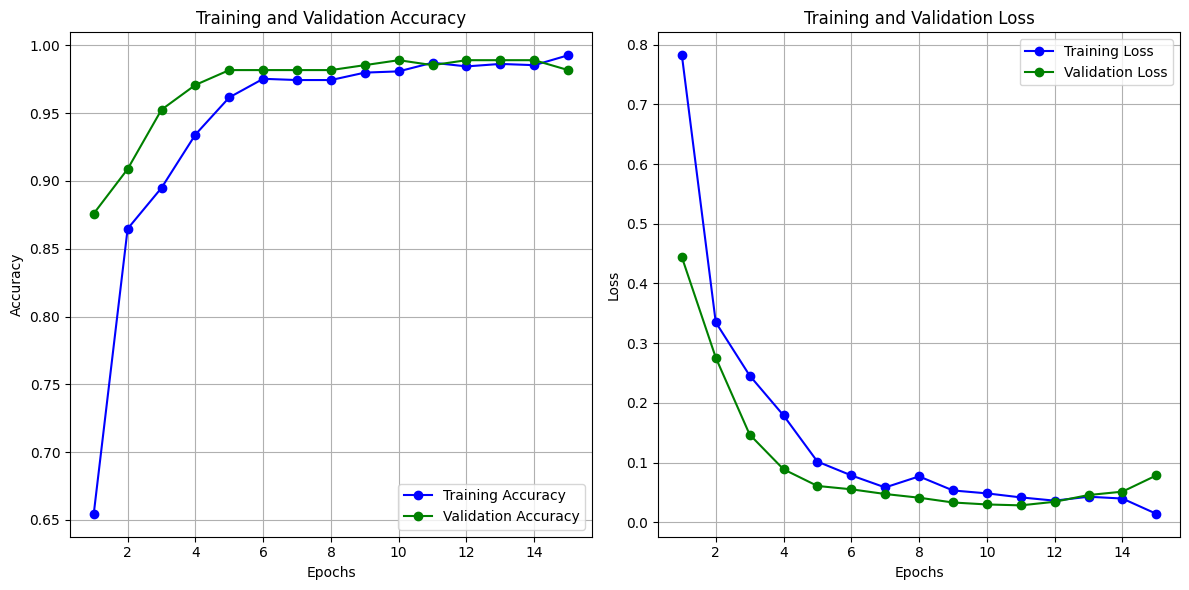

In [44]:
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color = 'blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color = 'green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color = 'blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color = 'green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()